Projet Python data visualisation (facultatif)
Comme convenu en cours, je vous propose un projet en plus de votre évaluation de cet après midi. 

Le contexte 
Vous êtes data analyste pour un client (fictif ou non) et vous devez présenter une analyse de données complètes, de la formulation d’une problématique à l'élaboration de graphiques pertinents ainsi qu'une mise en oeuvre respectant les conditions ci-dessous. 

Consignes 

Votre analyse sous forme de Jupyter Notebook devra contenir:

    Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
    Au moins 1 diagramme avec des données discrètes
    Au moins 2 graphiques avec des données catégoriques
    1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
    1 heat map avec matrice de corrélation (si pertinent)
    Des commentaires clairs et pertinents pour chaque graphiques 


Date de livraison 
Vendredi 05-02-2021 : 9h00

Modalité d’évaluation [Notation sur 20]

4 compétences évaluées 

    Compréhension du sujet 
    Structure de l’exposé 
    Présentation orale et fluidité 
    Présentation écrite (fluidité du notebook)


Je reste à votre disposition par mail si vous avez des questions. 


BD

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
#import datasets
cadf = pd.read_csv("./data/Cybersecurity_attacks.csv")
tcp_ports = pd.read_csv("./data/TCP-ports.csv")
df = pd.merge(cadf,
        tcp_ports[['Port','Service', 'Description']],
        how="left",
        left_on="Destination Port",
        right_on="Port")
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Port,Service,Description
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,80.0,http,HTTP
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,NaN,NaN,NaN
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,80.0,http,HTTP
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,5555.0,personal-agent,Personal Agent
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,80.0,http,HTTP


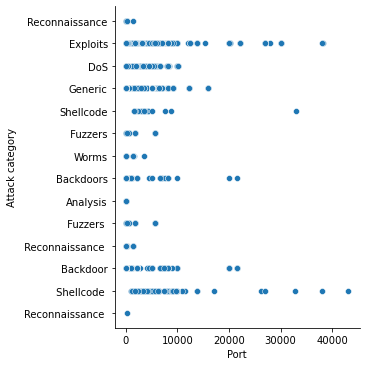

In [3]:
sns.relplot(x="Port",y="Attack category",data=df)

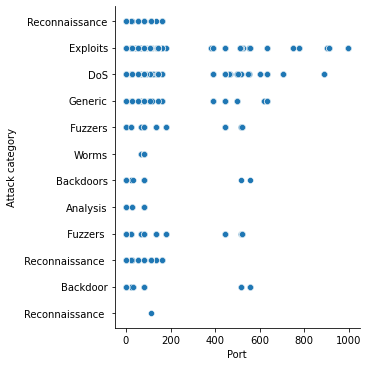

In [4]:
#afficher un nuage de point pour les Port <= 1000
filtred_port = df[df["Port"] <= 1000]

sns.relplot(x="Port",y="Attack category",data=filtred_port)

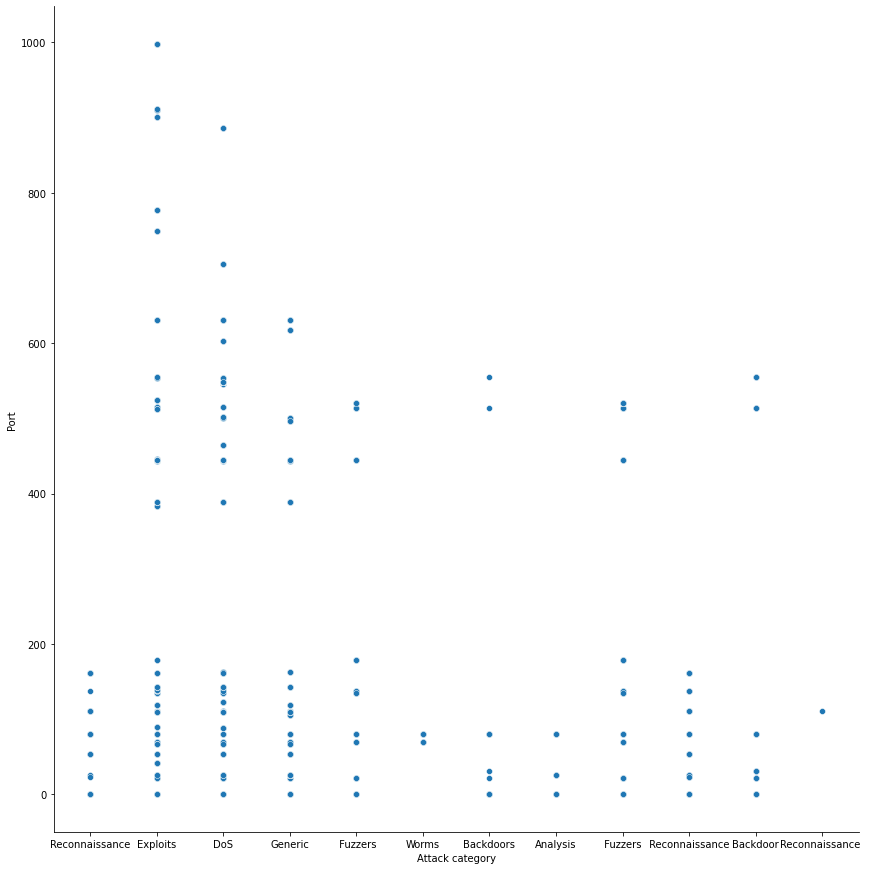

In [5]:
#agrandir la figure
sns.relplot(x="Attack category",
            y="Port",
            data=filtred_port,
           height=12)

Ici on voit que les attaques avec des Exploits touche plus de port 

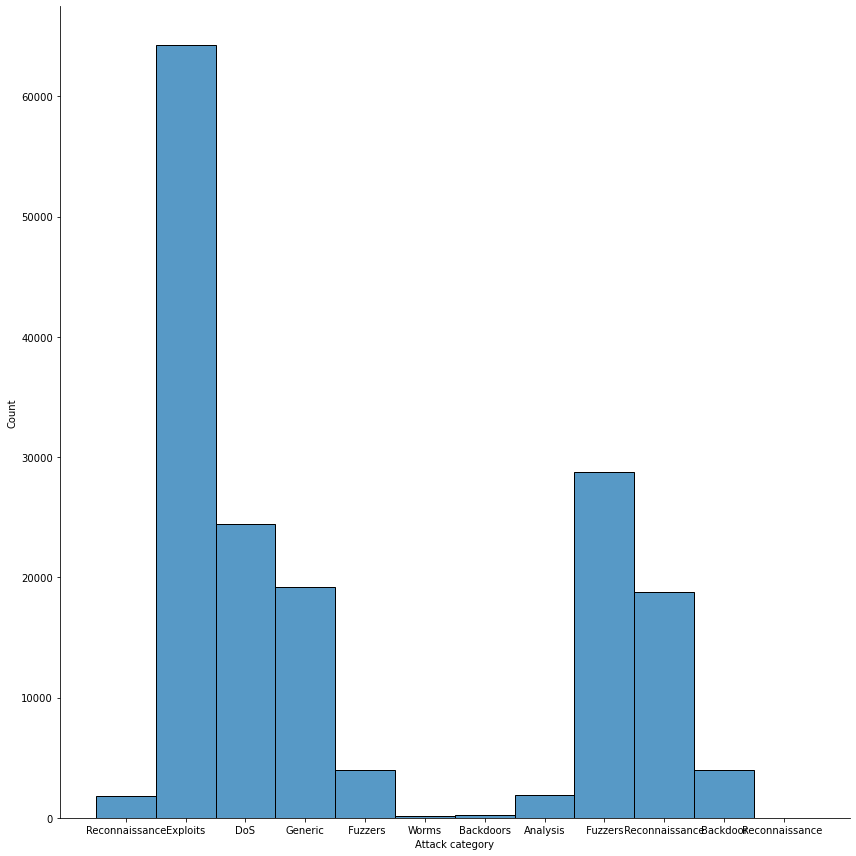

In [10]:
data=filtred_port['Attack category']
sns.displot(data, discrete=True,legend=True,height=12)
plt.show()

Dans ce graphique on remarque que les attaques la categorie d'attaque la plus utilisé est Exploits 